# Prediction using Decision Tree Algorithm


---


## The Sparks Foundation GRIP Program


---


## **Description:**

This project aims to develop a decision tree classifier using the famous iris dataset. The classifier will predict the species of iris flowers based on their sepal and petal measurements. We'll go through the entire machine learning pipeline, from data collection to model evaluation and interpretation.

## **Objectives:**

1. Load and explore the iris dataset
2. Preprocess the data for machine learning
3. Visualize the relationships between features
4. Build and train a decision tree classifier
5. Evaluate the model's performance
6. Visualize the decision tree
7. Make predictions on new data

## **Author:** Aziz Sayadi



# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


iris_df = pd.read_csv('/content/Iris.csv')

print(iris_df.head())
print(iris_df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


# Data Preprocessing

In [2]:
print(iris_df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [3]:
# Remove Id column which is not relevant for the prediction
iris_df.drop(columns='Id', inplace=True)

In [4]:
# Split the data into features (X) and target (y)
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print(f'training set shape: {X_train.shape}')

training set shape: (120, 4)


In [7]:
print(f'testing set shape: {X_test.shape}')

testing set shape: (30, 4)


# Data Visualization

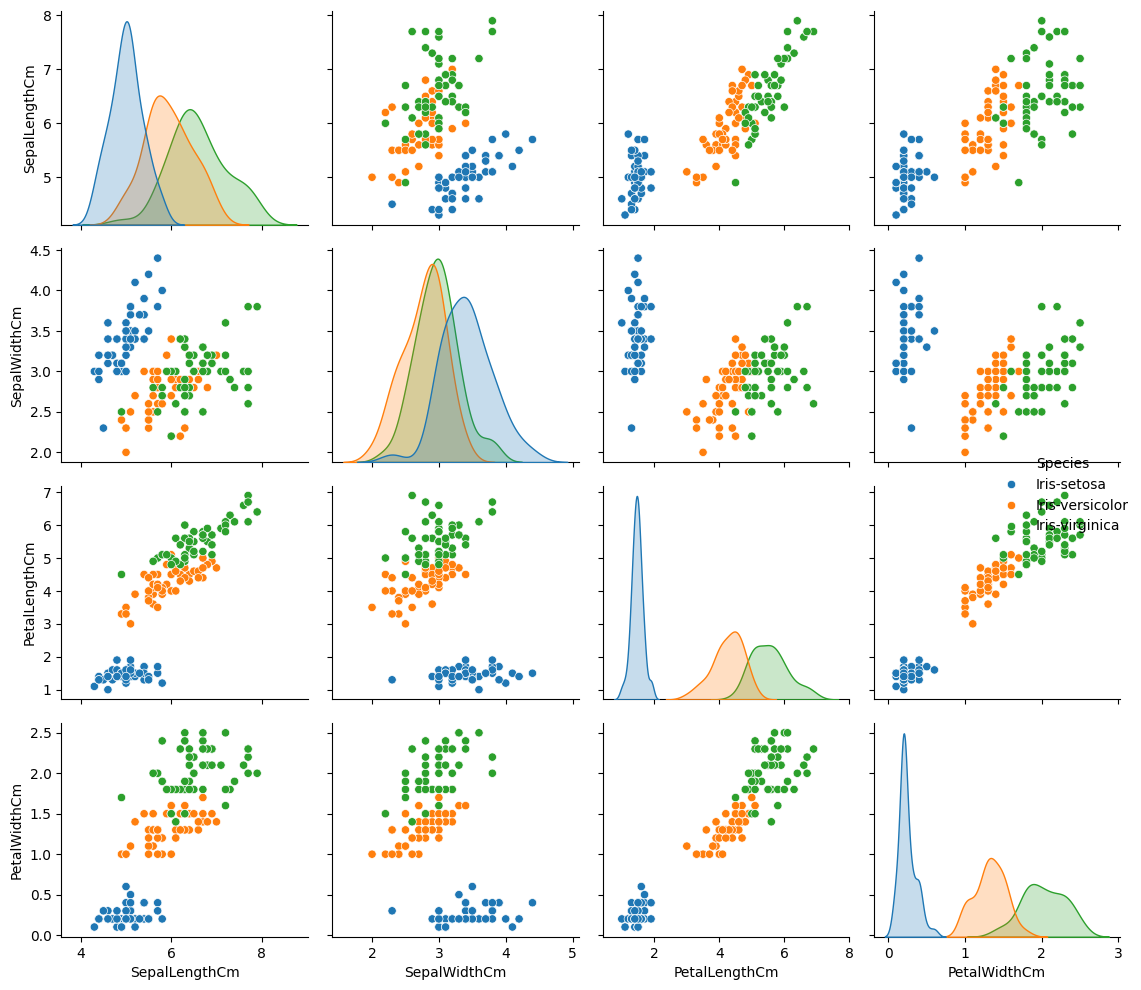

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='Species')
plt.tight_layout()
plt.show()

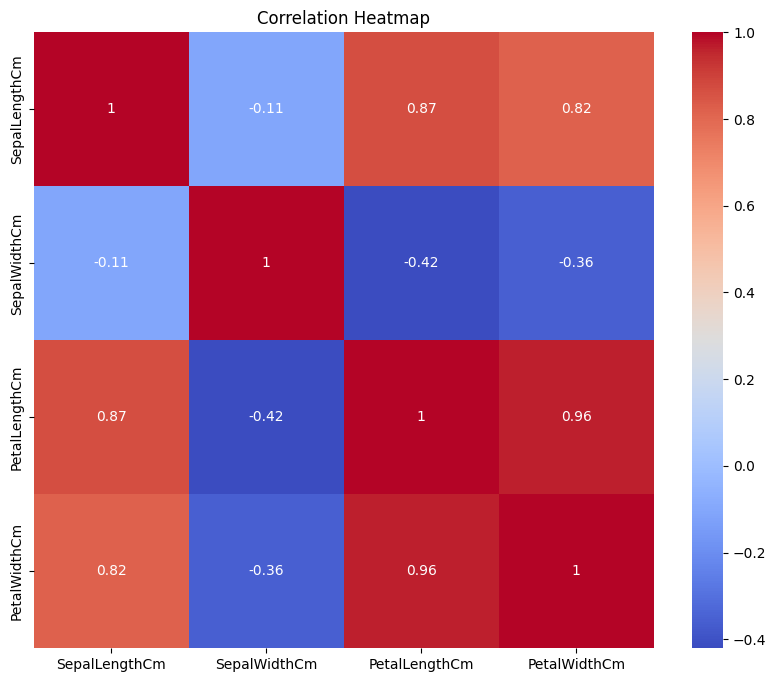

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [18]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


# Model Evaluation

Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


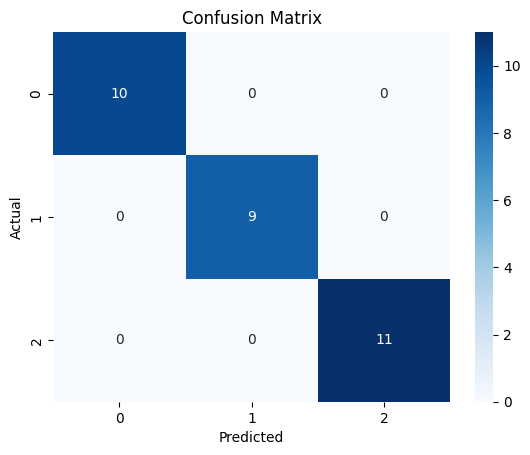

In [19]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Visualization

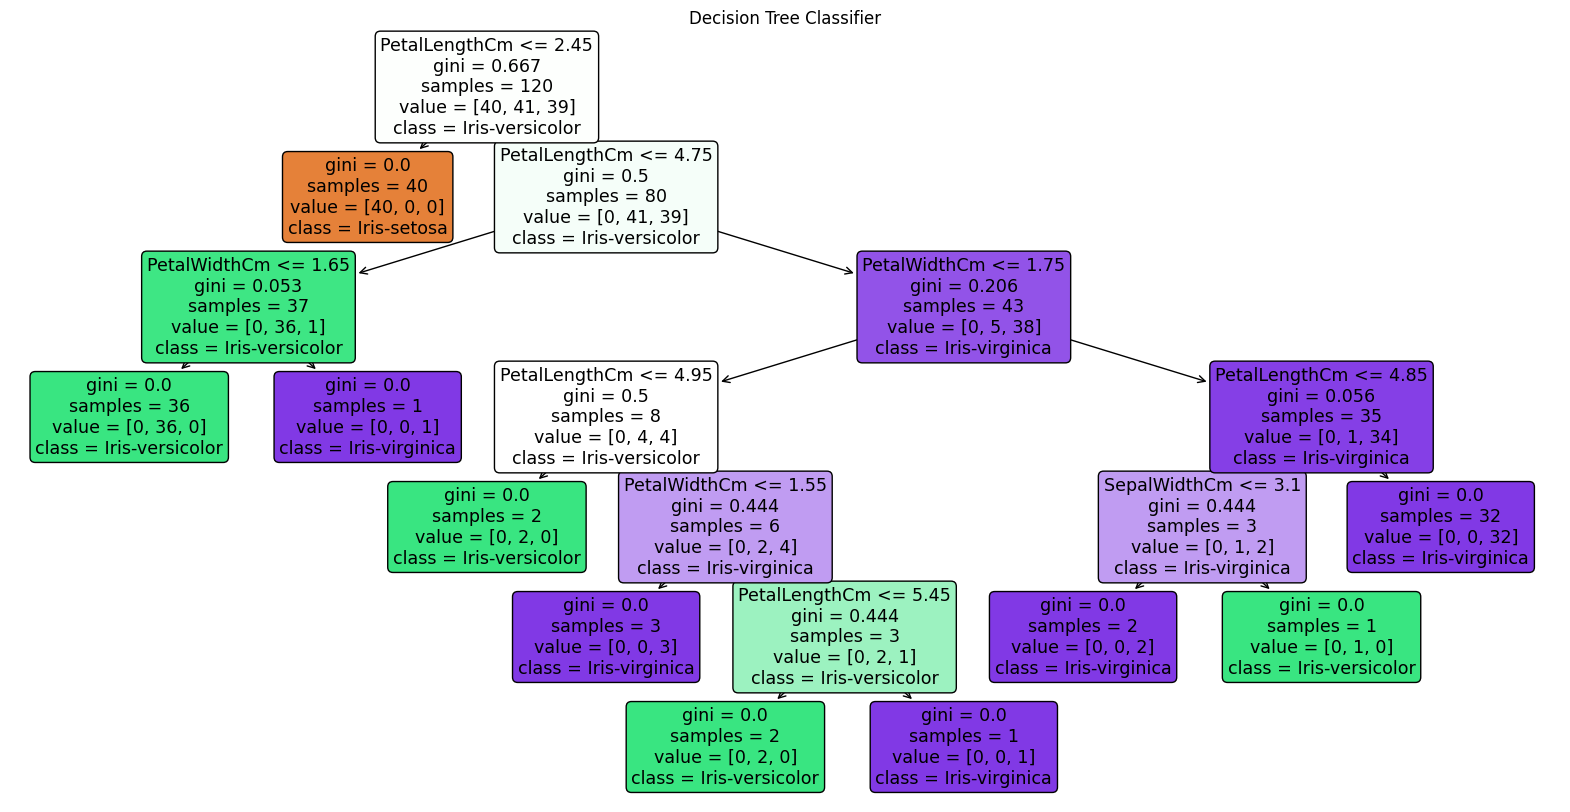

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

# Making New Predictions

In [21]:
# Function to predict species
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = dt_classifier.predict(input_data)
    return prediction[0]

# Example prediction
new_flower = [5.1, 3.5, 1.4, 0.2]
predicted_species = predict_species(*new_flower)
print(f"Predicted species for {new_flower}: {predicted_species}")

Predicted species for [5.1, 3.5, 1.4, 0.2]: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Results Communication
1. The decision tree classifier achieved an accuracy of 100% on the test set.
2. The classification report shows the precision, recall, and F1-score for each species.
3. The confusion matrix visualizes the model's performance in classifying each species.
4. The decision tree visualization helps us understand the most important features for classification.
5. The topmost node represents the most important feature for splitting the data.
6. This model can now be used to predict the species of iris flowers based on their sepal and petal measurements.